<a href="https://colab.research.google.com/github/pachterlab/monod_examples/blob/main/Monod_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Monod* on Colab

In the current notebook, we apply *Monod* to a set of small ($\approx$ 1000-cell) datasets.

# Inference pipeline

## Define aesthetics

In [1]:
import time
t1 = time.time()
#a e s t h e t i c s

fs = 16
nbin=40

#https://github.com/BlakeRMills/MetBrewer
Degas=("#591d06", "#96410e", "#e5a335", "#556219", "#418979", "#2b614e", "#053c29")
Demuth = ("#591c19", "#9b332b", "#b64f32", "#d39a2d", "#f7c267", "#b9b9b8", "#8b8b99", "#5d6174", "#41485f", "#262d42")


## Install prerequisites

In [2]:
!pip install -i https://pypi.org/simple/  monod  

Looking in indexes: https://pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 4.1 MB/s 
     |████████████████████████████████| 4.8 MB 27.9 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 60.0 MB/s 
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=e80765eb1688f6dc36fe48379a9644893e9af87506e9c4847bc8c971ca1e0be3
  Stored in directory: /root/.cache/pip/wheels/48/36/9f/eb3377d4a7423b96105b6667d36c3faa49ee73b96d8cab80b3
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=a3be11377718016df80f448a792569dbc938c0f26147494c01823cff875a6692
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built loompy algopy


Let's make sure that the version is correct.

In [3]:
!pip show monod

Name: monod
Version: 0.2.2.2
Summary: the Monod package fits CME models to sequencing data.
Home-page: https://github.com/pachterlab/monod
Author: Gennady Gorin, Lior Pachter
Author-email: ggorin@caltech.edu, lpachter@caltech.edu
License: None
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy, anndata, numdifftools, loompy, pytz
Required-by: 


## Import data

In [4]:
! git clone https://github.com/pachterlab/monod_examples.git

Cloning into 'monod_examples'...
remote: Enumerating objects: 382, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 382 (delta 23), reused 26 (delta 9), pack-reused 331
Receiving objects: 100% (382/382), 183.61 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (110/110), done.
Checking out files: 100% (176/176), done.


In [5]:
!rm -r sample_data

In [6]:
!mv monod_examples/* .

In [7]:
!mv sample_data/* .

## Import package components

In [8]:
import monod

In [9]:
from monod import *
from monod.preprocess import *
from monod.extract_data import *
from monod.cme_toolbox import CMEModel
from monod.inference import InferenceParameters, GradientInference
from monod.analysis import *

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


## Define metadata

In [10]:
dataset_names = ['allen_B01_gaba','allen_C01_gaba','neuron_1k_v3','heart_1k_v3'] 
loom_filepaths = ['./'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

## Run pre-processing

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Directory ./fits/gg_220531_022_mouse_1 created.
INFO:root:Dataset: allen_B01_gaba
INFO:root:765 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4591 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba created.
INFO:root:Dataset: allen_C01_gaba
INFO:root:750 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4993 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba created.
INFO:root:Dataset: neuron_1k_v3
INFO:root:1330 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4960 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3 created.
INFO:root:Dataset: heart_1k_v3
INFO:root:982 cells detect

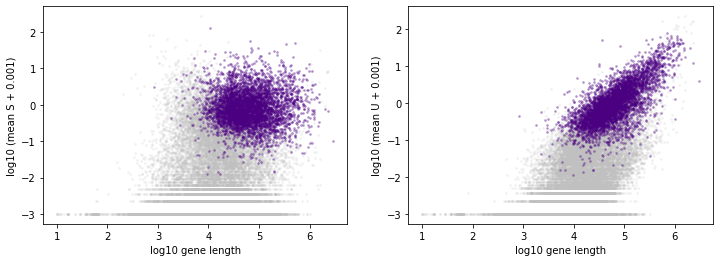

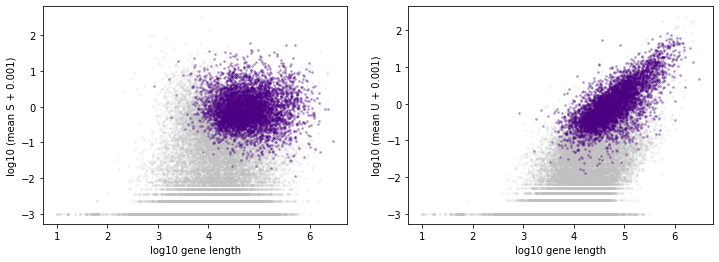

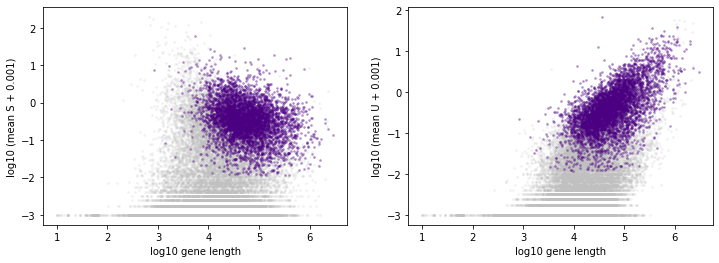

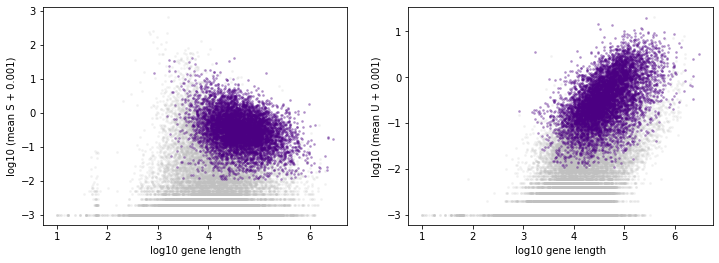

In [11]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='mouse',batch_id=1,\
                                             n_genes=200)

## Run inference

In this example, we will fit the bursty and constitutive models to all four datasets, using a Poisson sampling model on a $6\times 7$ grid. For this Colaboratory notebook, we only use 4 iterations from the MoM estimate.

allen_B01_gaba
Bursty
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_B01_gaba
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220531_022_mouse_1/genes.csv.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 317.4 seconds.
Constitutive
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Constitutive_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Constitutive_Poisson_6x7/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Constitutive_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 147.4 seconds.
allen_C01_gaba
Bursty
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_C01_gaba
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220531_022_mouse_1/genes.csv.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 317.5 seconds.
Constitutive
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Constitutive_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Constitutive_Poisson_6x7/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Constitutive_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 147.4 seconds.
neuron_1k_v3
Bursty
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: neuron_1k_v3
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220531_022_mouse_1/genes.csv.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 339.9 seconds.
Constitutive
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Constitutive_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Constitutive_Poisson_6x7/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/neuron_1k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Constitutive_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 155.3 seconds.
heart_1k_v3
Bursty
INFO:root:Directory ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Beginning data extraction.
INFO:root:Dataset: heart_1k_v3
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:Gene list extracted from ./fits/gg_220531_022_mouse_1/genes.csv.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/heart_1k_v3/diagnostic_figures created.
INFO:root:Search data stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 481.4 seconds.
Constitutive
INFO:root:Directory ./fits/gg_220531_022_mouse_1/heart_1k_v3/Constitutive_Poisson_6x7 created.
INFO:root:Global inference parameters stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Constitutive_Poisson_6x7/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/heart_1k_v3/raw.sd.
INFO:root:Starting parallelized grid scan.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/heart_1k_v3/Constitutive_Poisson_6x7/analysis_figures created.
INFO:root:Runtime: 215.6 seconds.


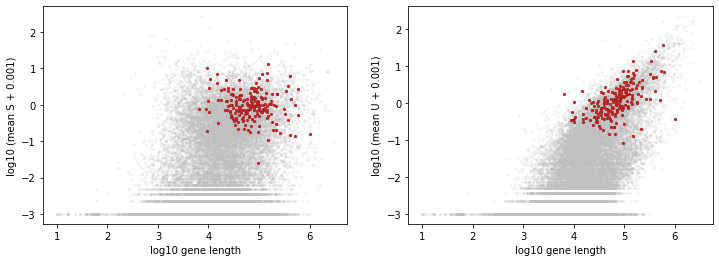

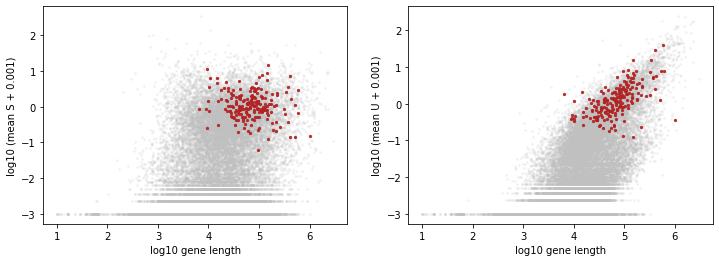

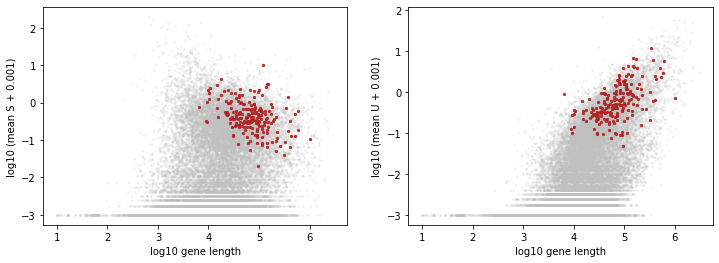

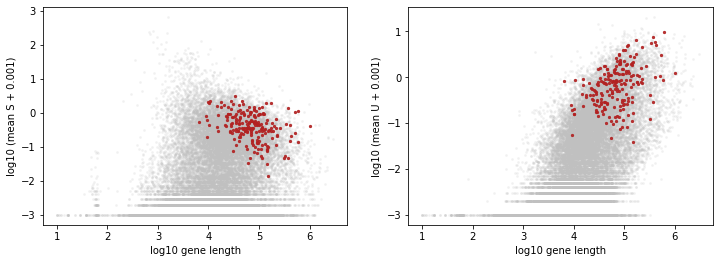

In [15]:
models = ('Bursty','Constitutive')
n_datasets = len(dataset_names)
n_models = len(models)
lb = [[-1.0, -1.8, -1.8 ],
      [-1.0, -1.0 ]]
ub = [[4.2, 2.5, 3.5],
      [3.5, 3.5]]
grid = [6,7]

result_strings = []
for i in range(n_datasets):
    print(dataset_names[i])
    for j in range(n_models):
        fitmodel = CMEModel(models[j],'Poisson')
        print(models[j])
        inference_parameters = InferenceParameters(lb[j],ub[j],[-8, -3],[-5, 0],grid,\
                    dataset_strings[i],fitmodel,use_lengths = True,
                    gradient_params = {'max_iterations':4,'init_pattern':'moments','num_restarts':1})
        if j==0:
            search_data = extract_data(loom_filepaths[i], transcriptome_filepath, dataset_names[i],
                                dataset_strings[i], dir_string, dataset_attr_names=attribute_names)
        else:
            search_data = load_search_data(dataset_strings[i]+'/raw.sd')
        full_result_string = inference_parameters.fit_all_grid_points(2,search_data)
        result_strings.append(full_result_string)


In [16]:
%%capture
!tar -czvf sample_fits.tar.gz fits

# Analysis

## Post-processing and QC

Load in search data.

In [17]:
sd_arr = [load_search_data(x+'/raw.sd') for x in dataset_strings]

INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/neuron_1k_v3/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220531_022_mouse_1/heart_1k_v3/raw.sd.


In [18]:
rs_burst = [result_strings[x] for x in (0,2,4,6)]
rs_const = [result_strings[x] for x in (1,3,5,7)]

In [20]:
rs_burst

['./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/grid_scan_results.res',
 './fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res',
 './fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/grid_scan_results.res',
 './fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/grid_scan_results.res']

Inspect all bursty result files and perform basic QC. We would like to be confident of the typical results:

*   The fits successfully recapitulate the joint count distributions
*   The sampling parameters appear to have a single unique optimum in $\{C_u, \lambda_s\}$
*   The physical parameters $\{b,\beta,\gamma\}$ are largely independent of gene length
*   The physical parameter distributions are consistent with a normal-inverse Gaussian law

In [21]:
sr_arr = []
j=0

INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.3 seconds.


/usr/local/lib/python3.7/dist-packages/monod/inference.py:582: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if gene_filter.dtype != np.bool:


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.2 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.2 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 9 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Re

/usr/local/lib/python3.7/dist-packages/monod/inference.py:769: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/length_dependence.png.


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:3857: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:3857: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/analysis_figures/parameter_marginals.png.


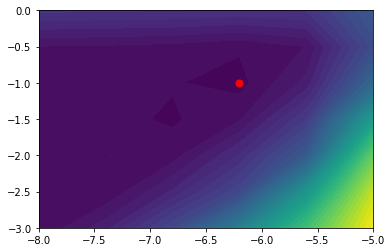

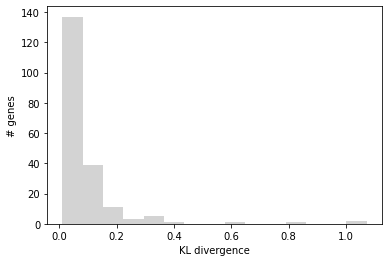

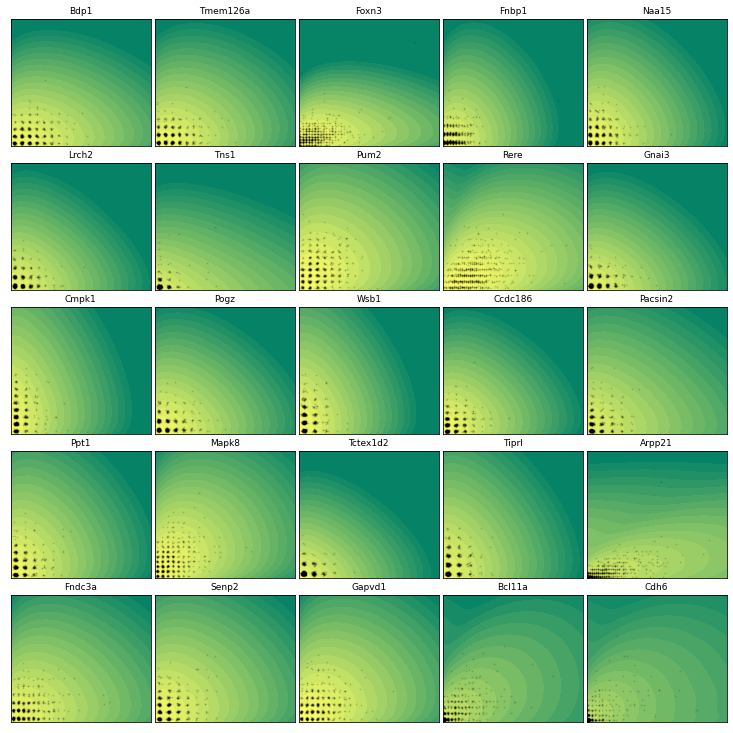

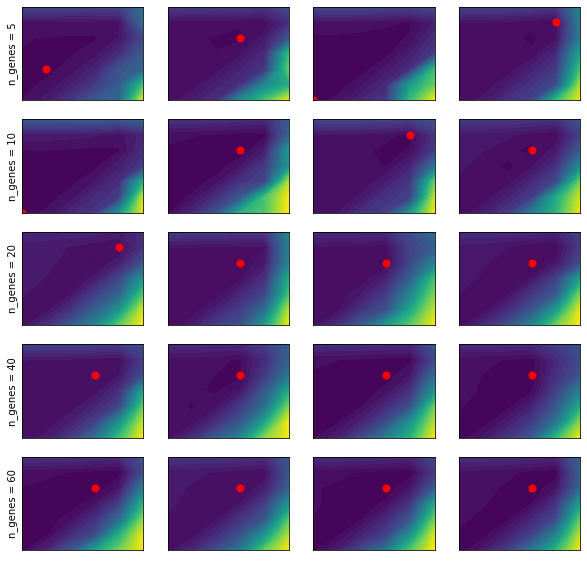

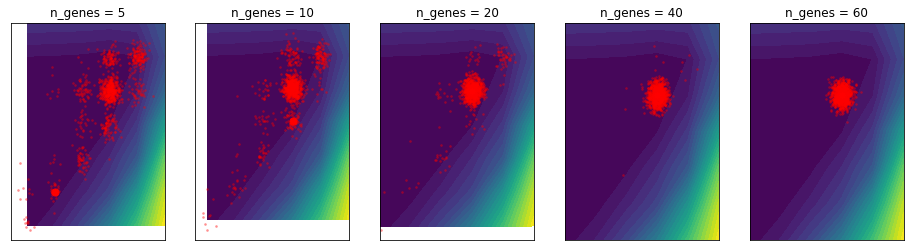

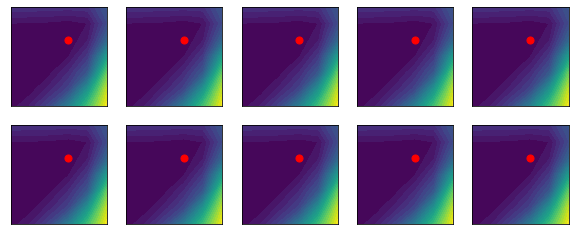

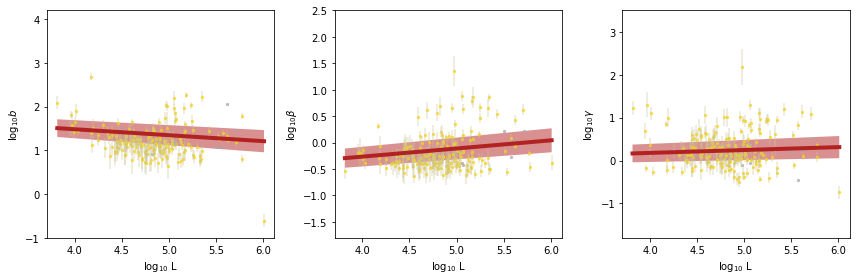

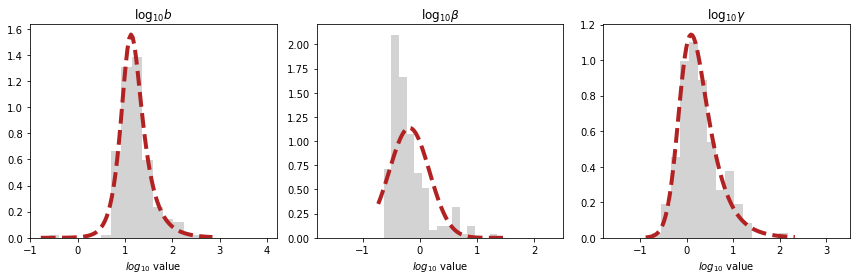

In [22]:
sr = load_search_results(rs_burst[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=2)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1


INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.


/usr/local/lib/python3.7/dist-packages/monod/inference.py:582: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if gene_filter.dtype != np.bool:


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 3 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Re

/usr/local/lib/python3.7/dist-packages/monod/inference.py:769: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/parameter_marginals.png.


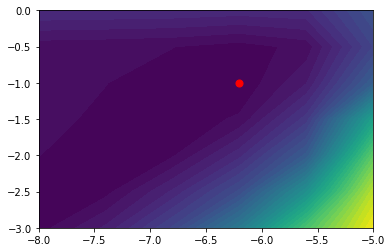

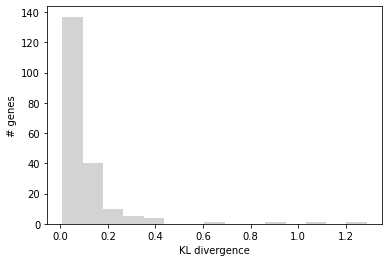

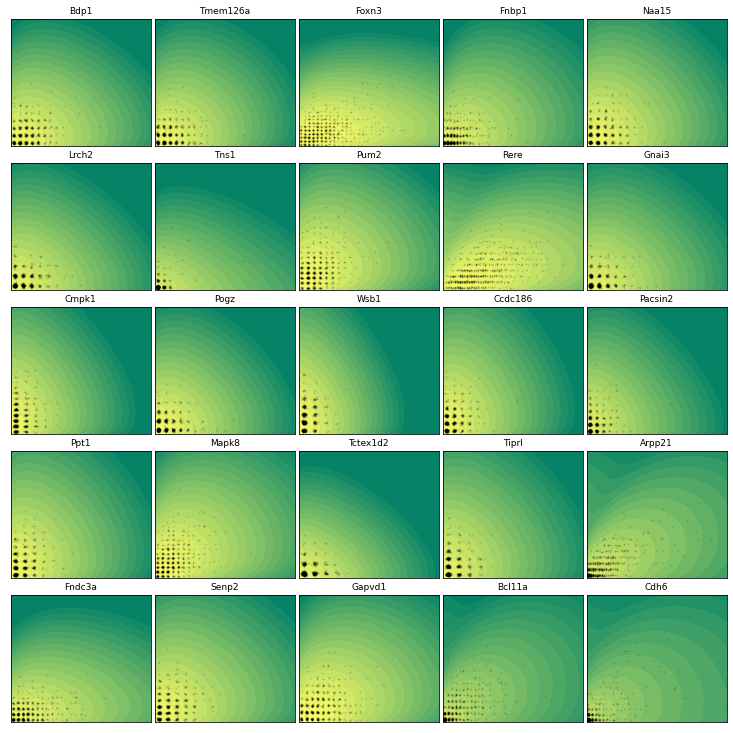

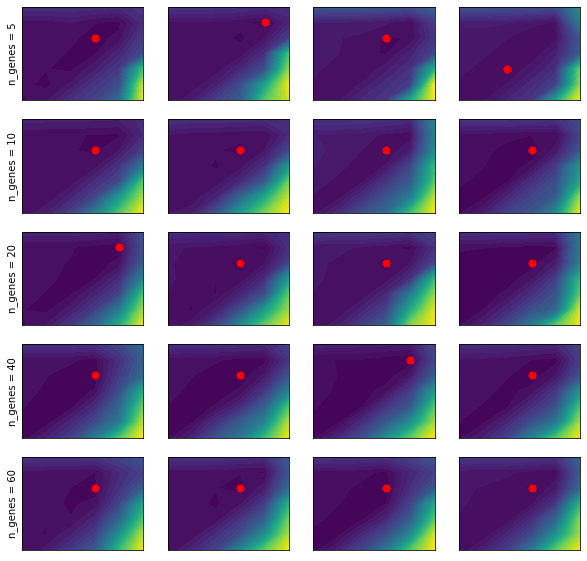

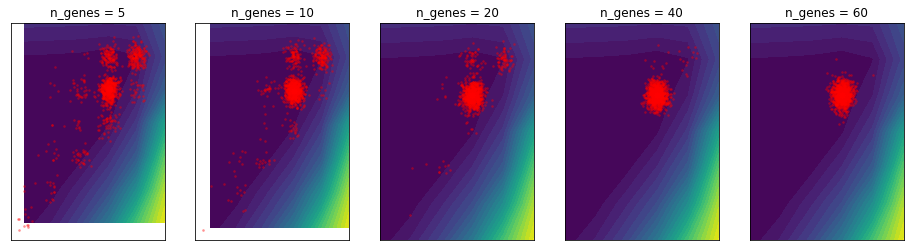

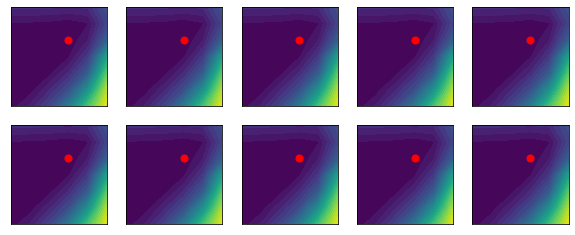

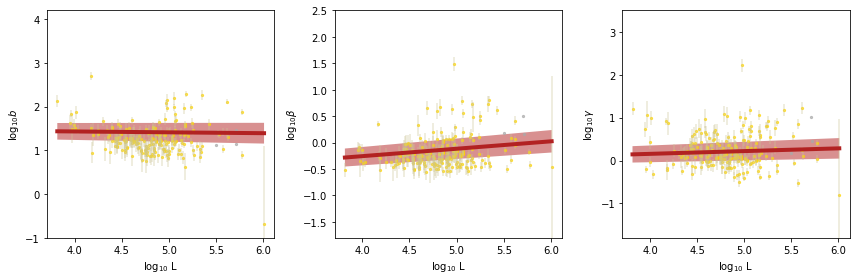

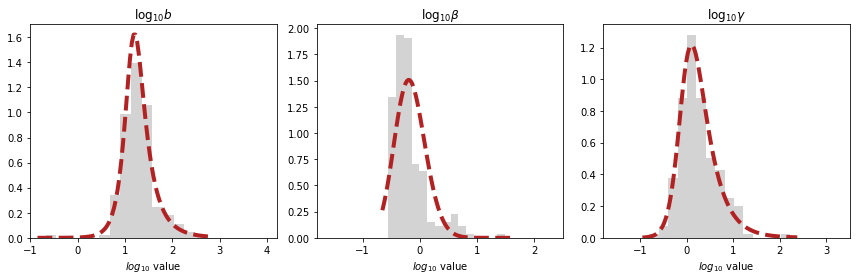

In [23]:
sr = load_search_results(rs_burst[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=2)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1


INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.3 seconds.


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/lib/python3.7/dist-packages/monod/inference.py:582: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if gene_filter.dtype != np.bool:


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.2 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. Rejected 21 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -6.20, -1.00.
INFO:root:Chi-square computation complete. R

/usr/local/lib/python3.7/dist-packages/monod/inference.py:769: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/analysis_figures/parameter_marginals.png.


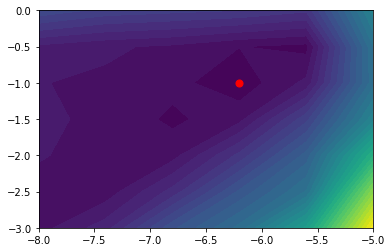

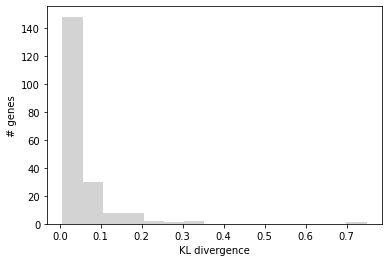

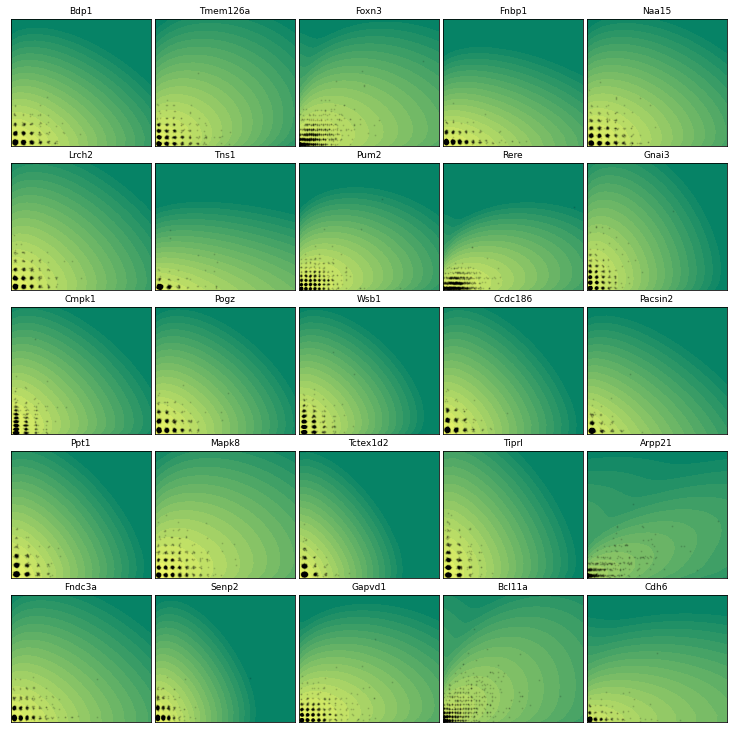

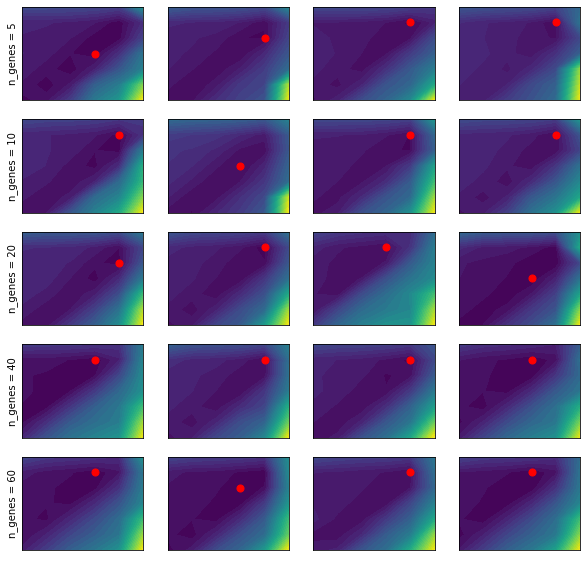

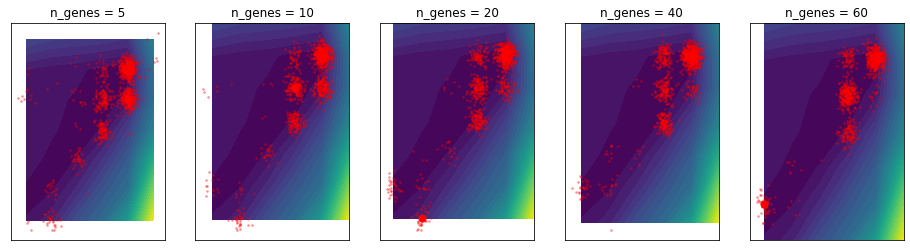

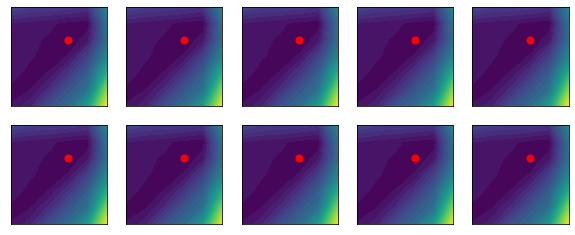

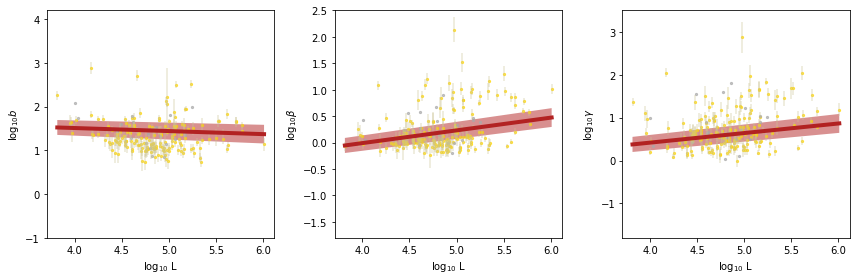

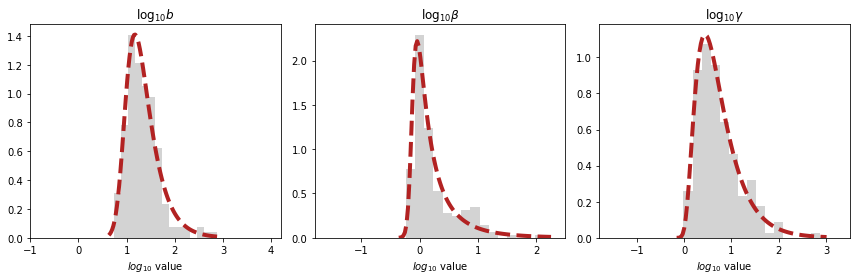

In [24]:
sr = load_search_results(rs_burst[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=2)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)

j+=1


INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.4 seconds.


/usr/local/lib/python3.7/dist-packages/monod/inference.py:582: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if gene_filter.dtype != np.bool:


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.4 seconds.
INFO:root:New optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rejected 17 genes out of 200. Runtime: 0.3 seconds.
INFO:root:New optimum: -5.60, -0.50.
INFO:root:Chi-square computation complete. Rej

/usr/local/lib/python3.7/dist-packages/monod/inference.py:769: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index,:] = np.sqrt(np.diag(hess_inv))/np.sqrt(self.n_cells)


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/length_dependence.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/analysis_figures/parameter_marginals.png.


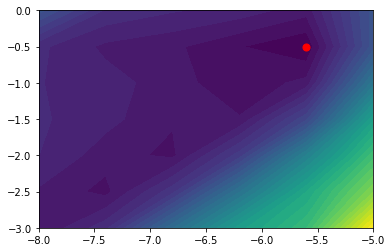

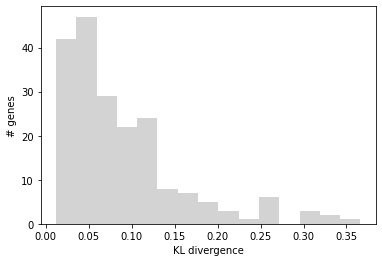

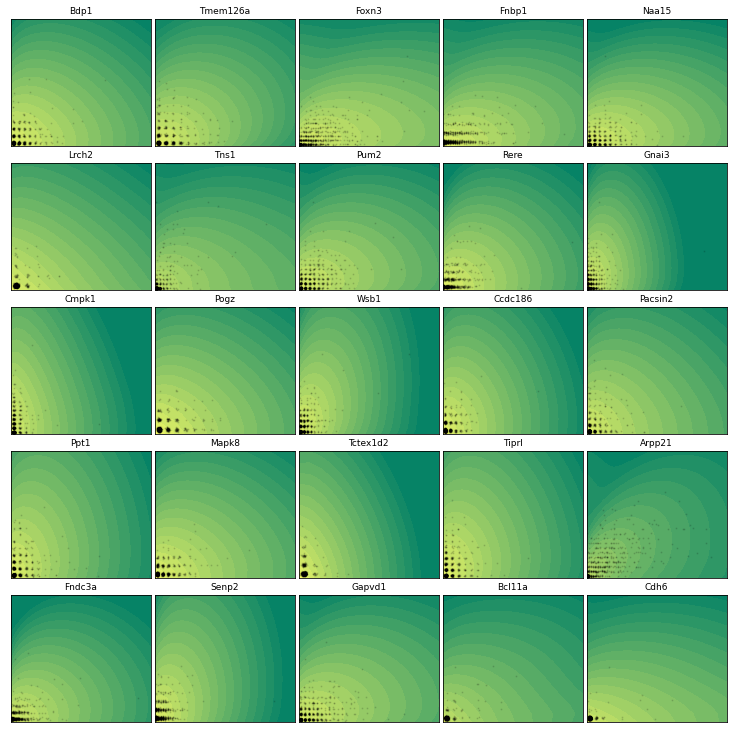

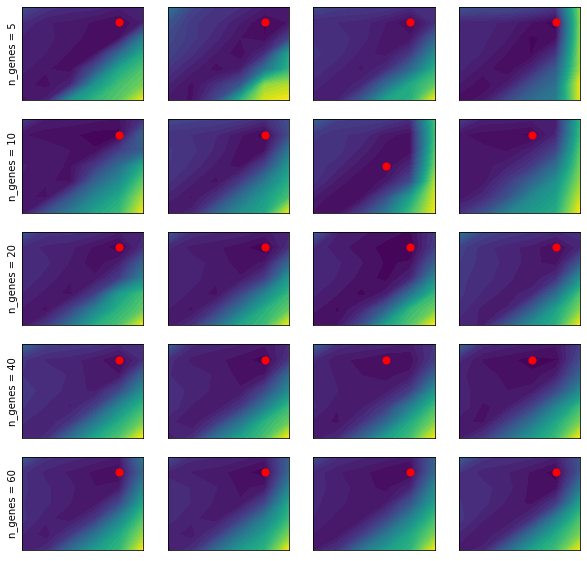

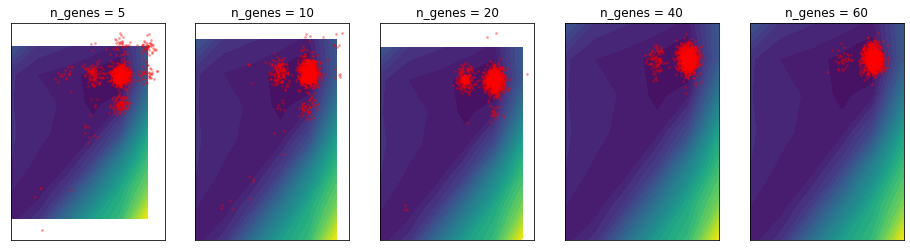

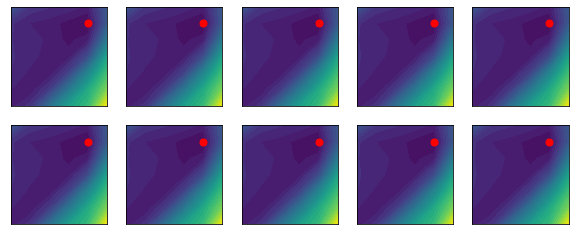

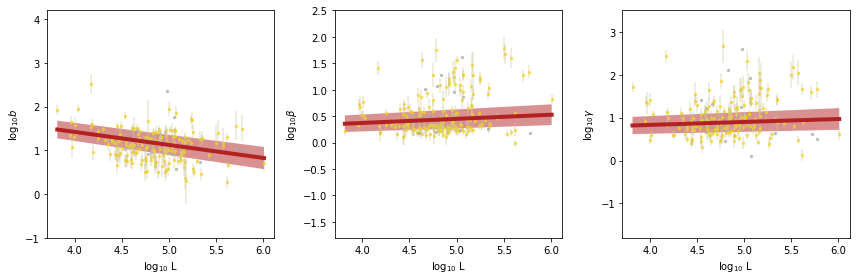

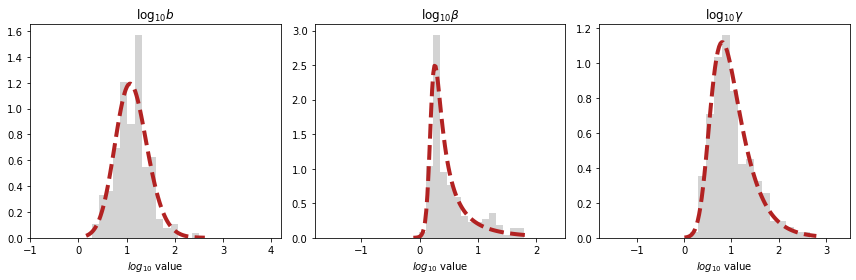

In [25]:
sr = load_search_results(rs_burst[j])
sd = sd_arr[j]
fig1,ax1 = plt.subplots(1,1)
sr.find_sampling_optimum()
sr.plot_landscape(ax1)



fig1,ax1 = plt.subplots(1,1)
sr.plot_KL(ax1)

sr.plot_gene_distributions(sd,marg='joint')

_=sr.chisquare_testing(sd)
sr.resample_opt_viz()
sr.resample_opt_mc_viz()
sr.chisq_best_param_correction(sd,viz=True) 

sr.compute_sigma(sd,num_cores=2)
sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
sr.plot_param_marg()
sr.update_on_disk()
sr_arr.append(sr)


In [ ]:
!tar -czvf sample_fits.tar.gz fits

# Model identification

With the fits computed, we can investigate whether the results are more consistent with the bursty or the constitutive model. To do this, we compute and plot the distribution of Akaike Information Criterion weights.

INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Constitutive_Poisson_6x7/grid_scan_results.res.
INFO:root:Directory ./fits/gg_220531_022_mouse_1/analysis_figures created.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/AIC_comparison_allen_B01_gaba_burst_const.png.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Constitutive_Poisson_6x7/grid_scan_results.res.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/AIC_comparison_allen_C01_gaba_burst_const.png.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fit

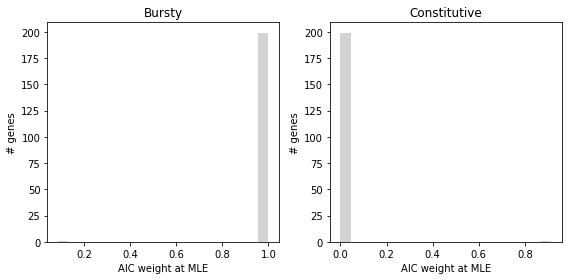

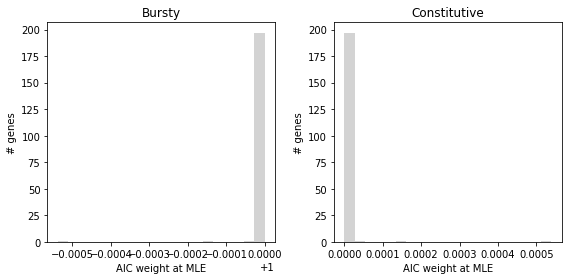

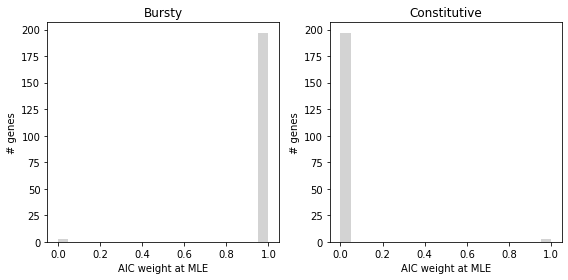

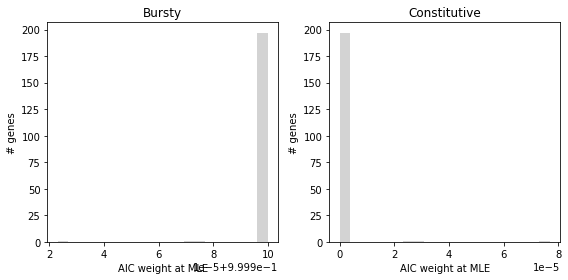

In [27]:
w = []

for j in range(n_datasets):
    sd = sd_arr[j]
    
    sr_burst = load_search_results(rs_burst[j])
    sr_burst.find_sampling_optimum()
    
    sr_const = load_search_results(rs_const[j])
    sr_const.find_sampling_optimum()
    
    make_batch_analysis_dir([sr_burst,sr_const],dir_string)

    w_ = plot_AIC_weights([sr_burst,sr_const],sd,models,meta=dataset_names[j]+'_burst_const',savefig=True)
    w.append(w_)


In [28]:
w = np.asarray(w)

In [29]:
w.mean(2)

array([[9.95428075e-01, 4.57192503e-03],
       [9.99996430e-01, 3.57026594e-06],
       [9.84991589e-01, 1.50084110e-02],
       [9.99999333e-01, 6.66590558e-07]])

In [30]:
w.mean(2).min(0)

array([9.84991589e-01, 6.66590558e-07])

In [31]:
w.mean(2).max(0)

array([0.99999933, 0.01500841])

In [32]:
(w[:,1,:]>0.5).sum(1)

array([1, 0, 3, 0])

The constitutive model is only judged likely ($w_j>0.5$) for at most a single gene per dataset. This suggests it is insufficiently powerful to describe sequencing data, and overdispersed models are mandatory.

# Variance decomposition

With the fits in hand, we can consider the distributions' variance decompositions and compare them to the change in $\text{CV}^2$ induced by normalization and log-transformation. First, we select the post-processed bursty fits.

In [33]:
rs_burst = [x[:-4 ]+'_upd.res' for x in rs_burst]

In [34]:
sr_arr = []

for j in range(n_datasets):
    sr = load_search_results(rs_burst[j])
    sr_arr.append(sr)

INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_B01_gaba/Bursty_Poisson_6x7/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/neuron_1k_v3/Bursty_Poisson_6x7/grid_scan_results_upd.res.
INFO:root:Grid scan results loaded from ./fits/gg_220531_022_mouse_1/heart_1k_v3/Bursty_Poisson_6x7/grid_scan_results_upd.res.


Now, we obtain the discarded part of $\text{CV}^2$ upon the non-parametric processing, as well as the extrinsic noise portion of the analytical noise decomposition at the maximum likelihood estimate. 

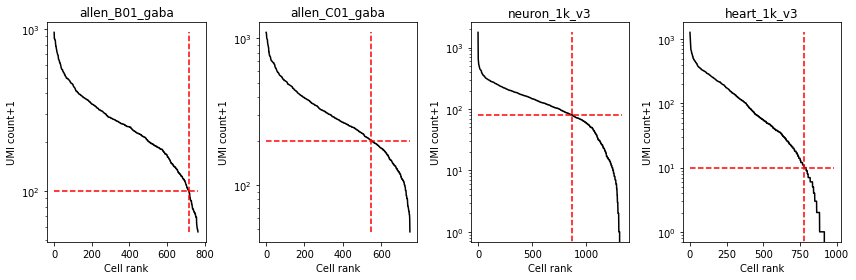

In [38]:
sz=(1,4)
fig1,ax1 = plt.subplots(sz[0],sz[1],figsize=(12,4))
thr = [1e2, 2e2, 8e1, 1e1]
for j in range(n_datasets):
    sd_arr[j].knee_plot(ax1=ax1[j],viz=True,thr=thr[j])
    ax1[j].set_title(dataset_names[j])
fig1.tight_layout()



In [43]:
f_tech_naive = []
f_ext_mech = []

for j in range(n_datasets):
    f_tech_naive.append(sd_arr[j].get_noise_decomp(knee_thr = thr[j])[:,1,1])
    sr_arr[j].find_sampling_optimum()
    d = sr_arr[j].get_noise_decomp()
    f_ext_mech.append(d[:,1,1]) #bursting noise
    
f_tech_naive = np.asarray(f_tech_naive)
f_ext_mech = np.asarray(f_ext_mech)


/usr/local/lib/python3.7/dist-packages/monod/extract_data.py:250: RuntimeWarning: invalid value encountered in true_divide
  U = U/(U.sum(0)[None,:]+pcount)*c2


Oddly, applying the "cell size" normalization and log-transformation to the the neuron and heart datasets substantially *increases* relative variance.

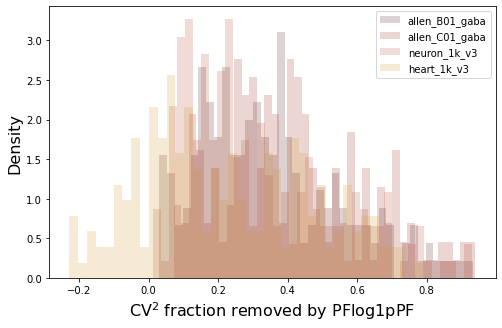

In [44]:
plt.figure(figsize=(8,5))
for j in range(n_datasets):
    plt.hist(f_tech_naive[j],nbin,alpha=0.2,density=True,facecolor=Demuth[j%len(Demuth)],label=dataset_names[j])
plt.xlabel(r'CV$^2$ fraction removed by PFlog1pPF',fontsize=fs)
plt.ylabel('Density',fontsize=fs)
plt.legend()

On the other hand, the fraction of noise attributable to extrinsic variation in transcription rate, under the bursty model, has a fairly consistent distribution across the four datasets.

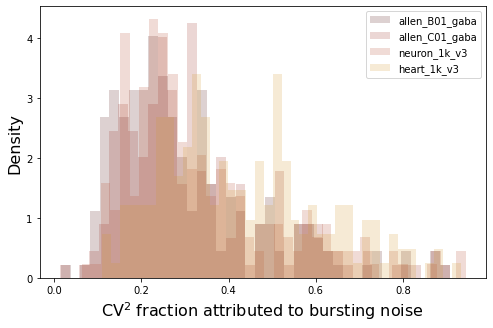

In [45]:
plt.figure(figsize=(8,5))
for j in range(n_datasets):
    plt.hist(f_ext_mech[j],nbin,alpha=0.2,density=True,facecolor=Demuth[j%len(Demuth)],label=dataset_names[j])
plt.xlabel(r'CV$^2$ fraction attributed to bursting noise',fontsize=fs)
plt.ylabel('Density',fontsize=fs)
plt.legend()

The biological noise fraction appears to vary with the noise fraction removed by PFlog1pPF for the two cell type-specific datasets. However, the perponderance of genes with increased variance in the two other datasets obscures the trend, possibly because the assumptions of the transformation are violated. 

INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/CV2_noise.png.


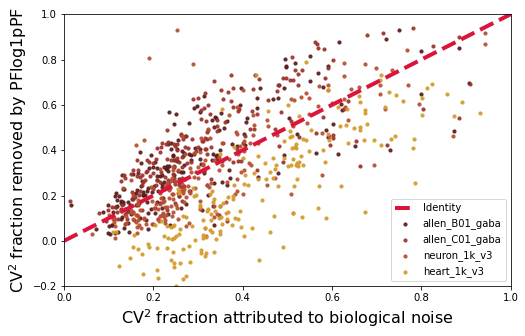

In [46]:
plt.figure(figsize=(8,5))
for j in range(n_datasets):
    plt.scatter(f_ext_mech[j],f_tech_naive[j],s=10,alpha=0.9,c=Demuth[j%len(Demuth)],label=dataset_names[j])
plt.plot([0,1],[0,1],'--',c='crimson',linewidth=4,label='Identity')
plt.xlabel(r'CV$^2$ fraction attributed to biological noise',fontsize=fs)
plt.ylabel(r'CV$^2$ fraction removed by PFlog1pPF',fontsize=fs)

plt.legend()

analysis_dir_string = dir_string+'/analysis_figures'
fig_string = analysis_dir_string+'/CV2_noise.png'
plt.xlim([0,1])
plt.ylim([-0.2,1])
plt.savefig(fig_string,dpi=450)
log.info('Figure stored to {}.'.format(fig_string))


# Differential regulation analysis

Finally, we can analyze the four mouse datasets in terms of differences between their mRNA copy number distribution, potentially suggest differential regulation of their transcriptional processes.

In [48]:
make_batch_analysis_dir(sr_arr,dir_string)

In [49]:
dataset_names

['allen_B01_gaba', 'allen_C01_gaba', 'neuron_1k_v3', 'heart_1k_v3']

In [50]:
pairs = [[0,1],[0,2],[2,3]]

INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/pair_parameter_comparison_pair_1.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/pair_parameter_comparison_pair_2.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/pair_parameter_comparison_pair_3.png.


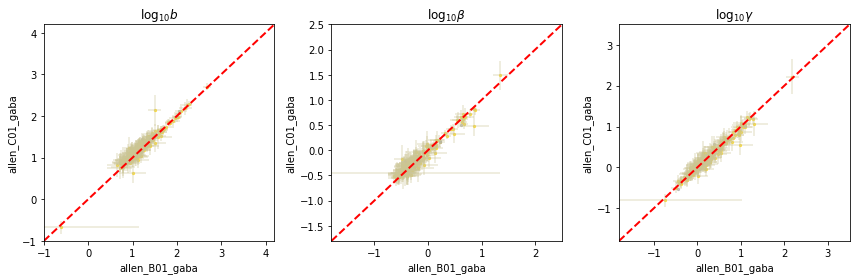

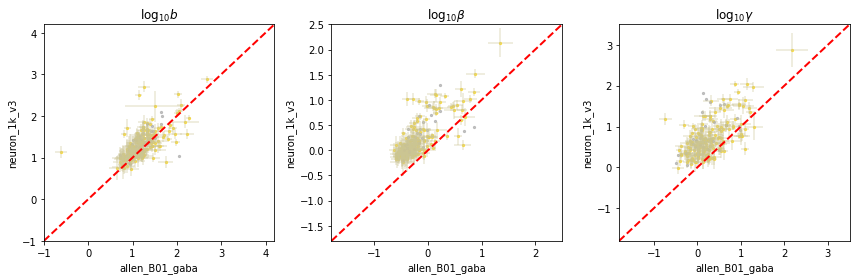

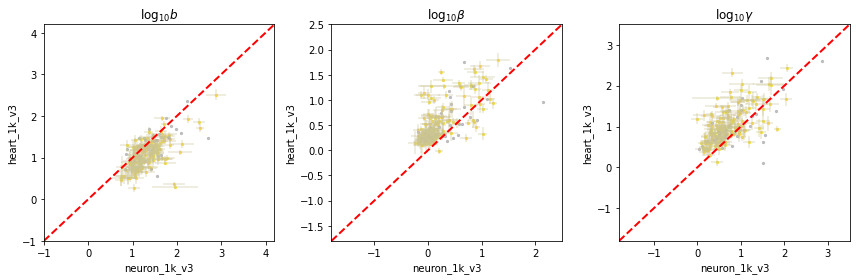

In [51]:
for i in range(len(pairs)):
    i1 = pairs[i][0]
    i2 = pairs[i][1]
    plot_params_for_pair(sr_arr[i1],sr_arr[i2],\
                         distinguish_rej=True,plot_errorbars=True,meta = 'pair_'+str(i+1),
                         xlabel = dataset_names[i1],\
                         ylabel = dataset_names[i2])

INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/mean_comparison_s.png.


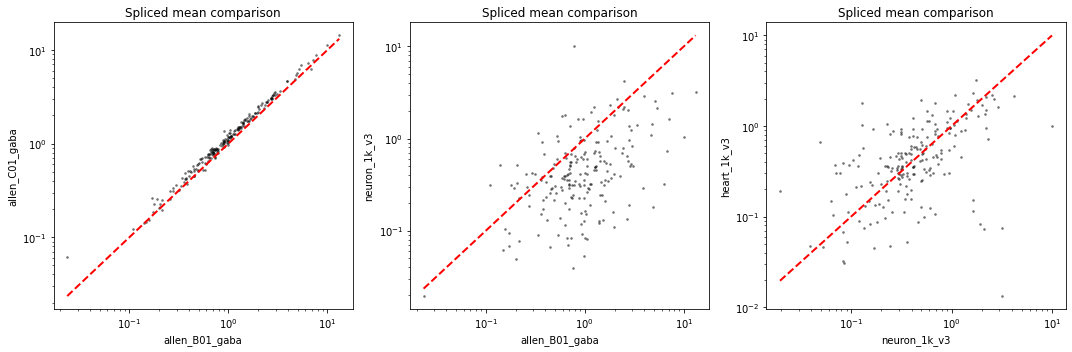

In [52]:
fig1,ax1= plt.subplots(1,len(pairs),figsize=(15,5))
for i in range(len(pairs)):
    i1 = pairs[i][0]
    i2 = pairs[i][1]
    m1 = [sd_arr[i1].moments[x]['S_mean']  for x in range(sd_arr[i1].n_genes)]
    m2 = [sd_arr[i2].moments[x]['S_mean'] for x in range(sd_arr[i2].n_genes)]
    ax1[i].scatter(m1,m2,3,'k',alpha=0.4)
    ax1[i].set_xscale('log')
    ax1[i].set_yscale('log')
    ax1[i].set_xlabel(dataset_names[i1])
    ax1[i].set_ylabel(dataset_names[i2])
    ax1[i].set_title('Spliced mean comparison')
    xl = [min(m1),max(m1)]
    ax1[i].plot(xl,xl,'r--',linewidth=2)
fig1.tight_layout()
fig_string = sr_arr[0].batch_analysis_string+'/mean_comparison_s.png'
plt.savefig(fig_string)
log.info('Figure stored to {}.'.format(fig_string))


INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/parameter_residuals_pair_1.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/parameter_residuals_pair_2.png.
INFO:root:Figure stored to ./fits/gg_220531_022_mouse_1/analysis_figures/parameter_residuals_pair_3.png.


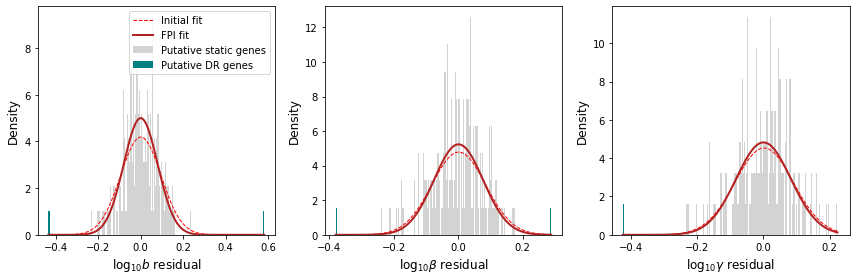

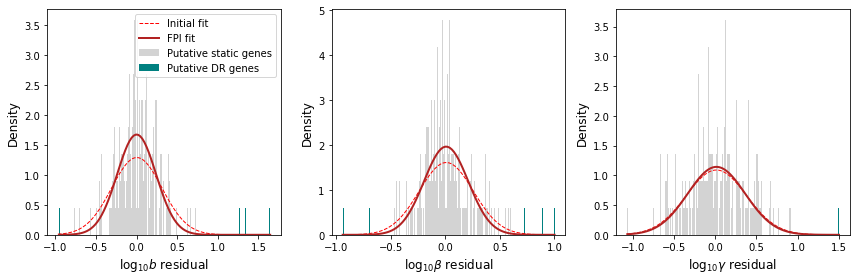

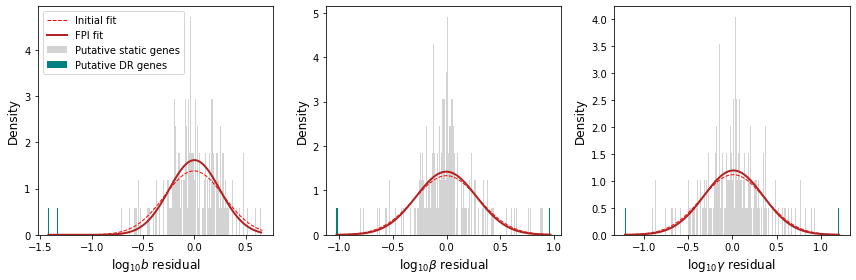

In [53]:
dr_analysis = []
for i in range(len(pairs)):
    i1 = pairs[i][0]
    i2 = pairs[i][1]
    dr_analysis.append(compute_diffreg(sr_arr[i1],sr_arr[i2],viz=True,modeltype='id',meta= 'pair_'+str(i+1),use_sigma=True))


In [54]:
dr_params = np.asarray([x[1] for x in dr_analysis])

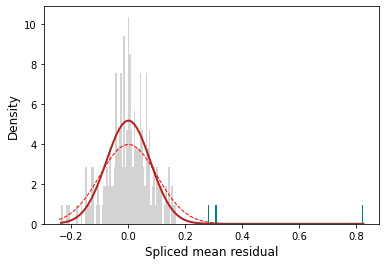

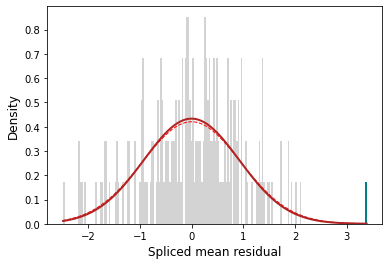

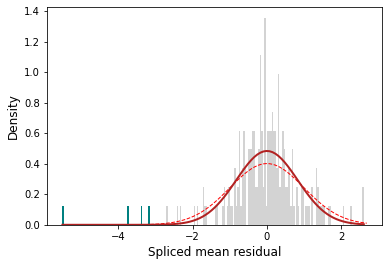

In [58]:
de_ttest = []
de_logmeanfpi = []
for i in range(len(pairs)):
    i1 = pairs[i][0]
    i2 = pairs[i][1]
    de_ttest.append(compute_diffexp(sd_arr[i1],sd_arr[i2],lognormalize=True,viz=False,method='ttest',knee_thr=[thr[i1],thr[i2]]))
    de_logmeanfpi.append(compute_diffexp(sd_arr[i1],sd_arr[i2],method='logmeanfpi',modeltype='id',viz=True))
de_ttest=np.asarray(de_ttest)
de_logmeanfpi=np.asarray(de_logmeanfpi)


In [59]:
de_ttest.shape

(3, 200)

In [60]:
dr_params.shape

(3, 3, 200)

In [61]:
gf = dr_params.any(1)

In [62]:
(gf & ~de_ttest).sum(1)

array([3, 1, 0])

In [63]:
gf.sum(1)

array([3, 7, 6])

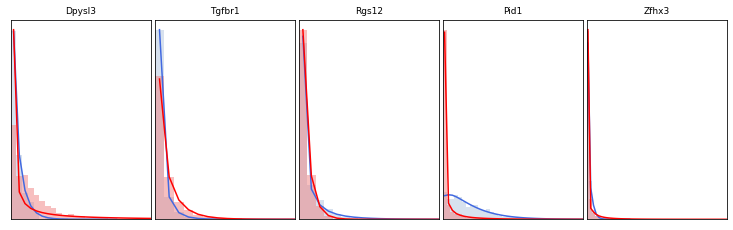

In [64]:
i=1
i1 = pairs[i][0]
i2 = pairs[i][1]
compare_gene_distributions([sr_arr[i1],sr_arr[i2]], [sd_arr[i1],sd_arr[i2]],
                          genes_to_plot=gf[i],marg='nascent',logscale=False,sz=(1,5),figsize=(10,3))

In [65]:
(gf & ~de_ttest).sum(1)

array([3, 1, 0])

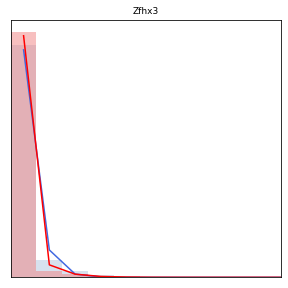

In [66]:
compare_gene_distributions([sr_arr[i1],sr_arr[i2]], [sd_arr[i1],sd_arr[i2]],
                          genes_to_plot=(gf & ~de_ttest)[i],marg='mature',logscale=False,sz=(1,2),figsize=(8,4))
plt.gcf().delaxes(plt.gca())

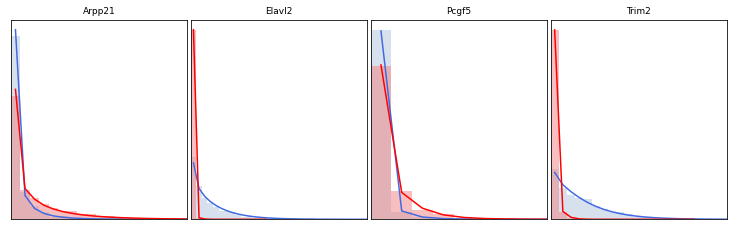

In [67]:
i=2
i1 = pairs[i][0]
i2 = pairs[i][1]
compare_gene_distributions([sr_arr[i1],sr_arr[i2]], [sd_arr[i1],sd_arr[i2]],
                          genes_to_plot=gf[i],marg='mature',logscale=False,sz=(1,4),figsize=(10,3))

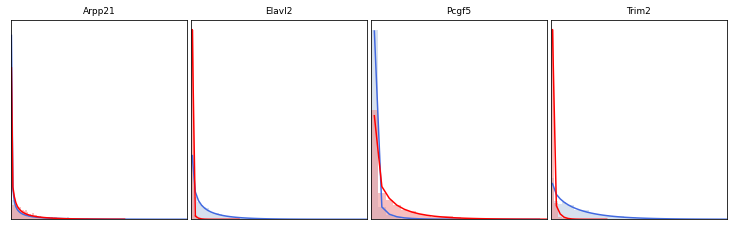

In [68]:
i=2
i1 = pairs[i][0]
i2 = pairs[i][1]
compare_gene_distributions([sr_arr[i1],sr_arr[i2]], [sd_arr[i1],sd_arr[i2]],
                          genes_to_plot=gf[i],marg='nascent',logscale=False,sz=(1,4),figsize=(10,3))

In [69]:
t2 = time.time()
print('Runtime: {:.0f} seconds.'.format(t2-t1))

Runtime: 4291 seconds.
